In [181]:
from flax import linen as nn
import numpy as np
from typing import Any, Callable, Optional, Tuple, Type, List
from jax import lax, random, numpy as jnp
import einops
import torchio
import torch
import matplotlib.pyplot as plt
import tempfile
import shutil
import os
import glob
import jax
import tensorflow as tf
import torch 
import einops
import torchio as tio
import optax
from flax.training import train_state  
from torch.utils.data import DataLoader
import jax.profiler
import ml_collections
from ml_collections import config_dict
from testUtils.spleenTest import get_spleen_data


In [182]:
cached_subj =get_spleen_data()[0]
sample_3d_ct=cached_subj[0]
sample_2d_ct=sample_3d_ct[0,0,:,:,64]


data loaded from hdf5


In [183]:
jax.image.resize(sample_3d_ct, (1,1,20,20,20), "linear")

Array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0.

(256, 256)

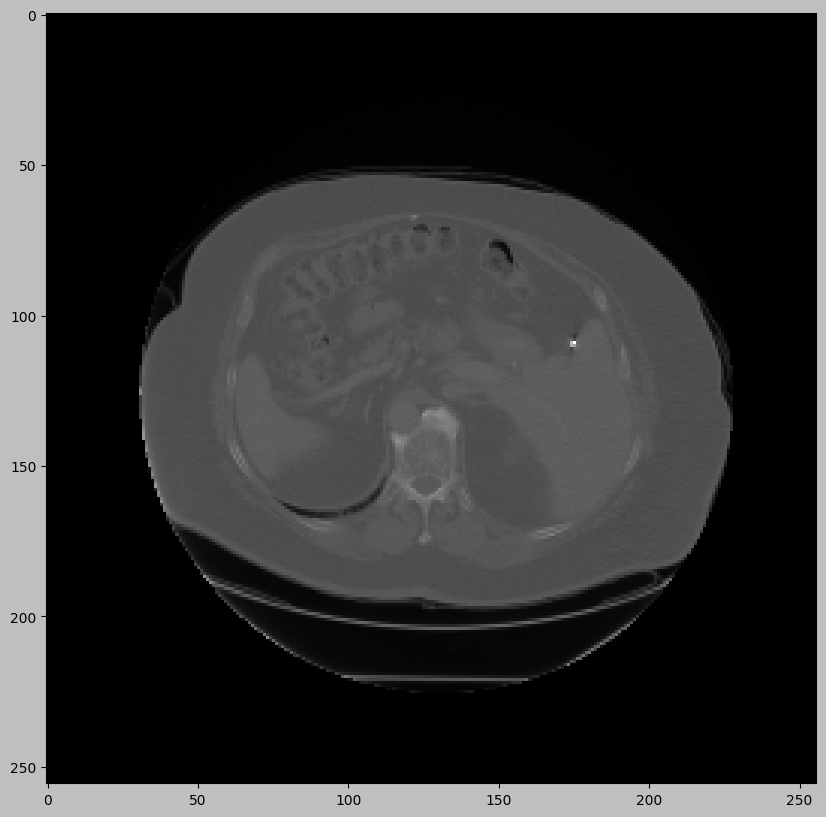

In [184]:
plt.figure(figsize=(20, 10))
plt.style.use('grayscale')
plt.imshow(np.rot90(sample_2d_ct))
sample_2d_ct.shape

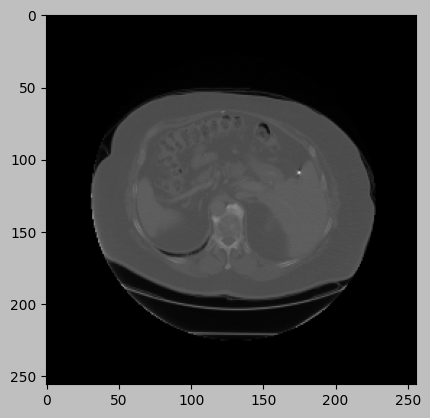

In [185]:
import pywt, scipy.misc
import jaxwt as jwt
import jax.numpy as jnp

#,level=2, mode="reflect"
@jax.jit
def test(sample_2d_ct):                           
    transformed = jwt.wavedec2(sample_2d_ct, pywt.Wavelet("haar"),mode="zero")
    # print(len(transformed))
    # print(transformed[0].shape)
    return jwt.waverec2(transformed, pywt.Wavelet("haar"))
reconstruction=test(sample_2d_ct)

plt.imshow(np.rot90(reconstruction))



In [186]:
from flax import linen as nn
import numpy as np
from typing import Any, Callable, Optional, Tuple, Type, List
from jax import lax, random, numpy as jnp
import einops
import torchio
import torch
import matplotlib.pyplot as plt
import tempfile
import shutil
import os
import glob
import jax
import tensorflow as tf
import torch 
import einops
import torchio as tio
import optax
from flax.training import train_state  
from torch.utils.data import DataLoader
import jax.profiler
import ml_collections
from ml_collections import config_dict
import numpy as np
import toolz
from einops import rearrange
from functools import partial

In [187]:
test_mage_shape= (1,2,8,8)
prob0_v= np.random.rand(np.product((1, 2, 2, 2))).reshape((1, 2, 2, 2))
prob0_h= np.random.rand(np.product((1, 2, 2, 2))).reshape((1, 2, 2, 2))

# aranged_test_im= np.arange(np.product(list(test_mage_shape)))
aranged_test_im= np.random.rand(np.product(list(test_mage_shape)))
aranged_test_im= np.reshape(aranged_test_im, test_mage_shape)

b,c,w,h = test_mage_shape
aranged_test_im

array([[[[0.04087014, 0.5778488 , 0.64768288, 0.73515106, 0.48269203,
          0.94458715, 0.37363454, 0.46254632],
         [0.64022049, 0.61697723, 0.54651692, 0.50439732, 0.94174464,
          0.59228129, 0.22705776, 0.26643837],
         [0.83161629, 0.92688949, 0.51799013, 0.04662092, 0.02052891,
          0.50769803, 0.07734924, 0.31384019],
         [0.95521785, 0.28895034, 0.96555802, 0.06379173, 0.68644348,
          0.60510444, 0.31829139, 0.48491762],
         [0.08552923, 0.69820053, 0.7463648 , 0.61630913, 0.08985292,
          0.65603205, 0.89680298, 0.65505453],
         [0.81890552, 0.28687955, 0.54491163, 0.72381968, 0.38038876,
          0.96898416, 0.93635305, 0.81347555],
         [0.45739266, 0.1457387 , 0.46106429, 0.93046565, 0.18985115,
          0.75074396, 0.62446642, 0.22961665],
         [0.37795091, 0.53533578, 0.19053306, 0.46879017, 0.62808079,
          0.43276591, 0.42830817, 0.98929642]],

        [[0.2070959 , 0.4070791 , 0.55024287, 0.39397786, 0.03

In [188]:
### calculating gt_id as far as I see it is deterministic given image and dimension of intrest


a1,a2=einops.rearrange(aranged_test_im,'ba c (a b) h->b ba c a h',b=2)
cat_feat=einops.rearrange([(a2[:,:, 0:-1 ,:]-a1[:,:,0:-1,:])
                ,(a2[:,:, 0:-1 ,:]-a1[:,:,1:,:])], 'baba ba c w h->ba (c baba ) w h')
cat_feat=cat_feat*cat_feat
cat_feat = jax.nn.relu(-jax.nn.relu(cat_feat)+1)
print(f"cat_feat {cat_feat}")
cat_feat= einops.rearrange(cat_feat,'b c w h-> (b w h c)')
cat_feat= einops.rearrange(cat_feat,'(a b)-> a b',b=2)
gt_id=jnp.argmax(cat_feat,axis=1, keepdims=False)

gt_id.shape

# jnp.ravel(cat_feat)


cat_feat [[[[0.64077915 0.99846897 0.98976545 0.94675271 0.7892707  0.87588058
    0.97851525 0.96154167]
   [0.98472265 0.59303365 0.79968299 0.99970516 0.55655779 0.99051199
    0.94194688 0.97073251]
   [0.46215922 0.83081505 0.95941662 0.98844148 0.91558893 0.90206098
    0.99843579 0.97490278]]

  [[0.96336765 0.90395439 0.99918622 0.79044077 0.15136157 0.99284567
    0.97758736 0.99775307]
   [0.2436417  0.83251428 0.95195433 0.69472453 0.64407971 0.99740638
    0.66532435 0.97105343]
   [0.86930845 0.98007926 0.99296962 0.95729744 0.96369542 0.95237122
    0.90272672 0.65910879]]

  [[0.89851135 0.86780449 0.91880121 0.98536033 0.98804025 0.99063812
    0.83049919 0.98054971]
   [0.52038728 0.99440792 0.94535713 0.81754016 0.82511531 0.69084519
    0.96290067 0.98961606]
   [0.41600149 0.8849931  0.91170156 0.9911602  0.87084896 0.88290372
    0.85534909 0.78181095]]

  [[0.94394779 0.99990637 0.73208679 0.99861211 0.99997155 0.6090645
    0.94374602 0.95784582]
   [0.2692025  0

(48,)

In [189]:
kernel_v = jnp.array([[[0, -1, 0], [0, 1, 0], [0, 0, 0]],
            [[0, 0, 0], [0, 1, 0], [0, -1, 0]]],dtype=jnp.float32)
# kernel_v=einops.rearrange(kernel_v,'c x y-> 1 c x y')

image_rgb= jnp.array(aranged_test_im,dtype=jnp.float32)
print(image_rgb.shape)
# image_rgb=einops.rearrange(image_rgb,'b c x y-> (b c x) y')
image_rgb = jnp.pad(image_rgb, ((0, 0),(0, 0),(0, 0), (1, 1)), mode='edge')# seem in numpy we are padding from first to last axis and in pytorch in opposite way

repeated= einops.repeat(kernel_v, 'c h w -> (c c2) 1 h w', c2=c)
print(f"repeated {repeated.shape} padded {image_rgb.shape}")

cat_feat = lax.conv_general_dilated(image_rgb,    # lhs = NCHW image tensor
               repeated, # rhs = OIHW conv kernel tensor
               (2, 1),  # window strides
                padding=((0, 0),(0, 0)),
               feature_group_count= c) # padding mode
print(f"cat_feat {cat_feat} ")
cat_feat = cat_feat*cat_feat

cat_feat = jax.nn.relu(-jax.nn.relu(cat_feat)+1)
b, c, h, w = cat_feat.shape
print(f" cat_feat.shape {cat_feat.shape}")
b, c, h, w = cat_feat.shape
cat_feat= einops.rearrange(cat_feat,'b c h w->(b h w c)')
cat_feat= einops.reduce(cat_feat,'(a b)-> a', 'max',b=2)

# cat_feat=reduce(x, 't b c -> b c', 'max')
print(f"cat_feat reduced {cat_feat.shape}")
# _, gt_id = cat_feat.permute(0, 2, 3, 1).reshape(-1, 2).max(1, keepdim=False)

# print(f"gt_id {gt_id.shape} permuted {cat_feat.permute(0, 2, 3, 1).shape} reshaped {cat_feat.permute(0, 2, 3, 1).reshape(-1, 2).shape} ")



(1, 2, 8, 8)
repeated (4, 1, 3, 3) padded (1, 2, 8, 10)
cat_feat [[[[ 0.59935033  0.03912842 -0.10116601 -0.23075372  0.4590526
    -0.3523059  -0.14657678 -0.19610795]
   [ 0.12360156 -0.6379391   0.44756788  0.01717082  0.6659146
     0.09740639  0.24094215  0.17107743]
   [ 0.7333763  -0.41132098 -0.20145315  0.10751057  0.29053584
     0.31295216  0.03955007  0.15842104]]

  [[ 0.59935033  0.03912842 -0.10116601 -0.23075372  0.4590526
    -0.3523059  -0.14657678 -0.19610795]
   [ 0.12360156 -0.6379391   0.44756788  0.01717082  0.6659146
     0.09740639  0.24094215  0.17107743]
   [ 0.7333763  -0.41132098 -0.20145315  0.10751057  0.29053584
     0.31295216  0.03955007  0.15842104]]

  [[ 0.2367535   0.0096764   0.51760334  0.03725444  0.00533381
     0.6252484  -0.23717922  0.20531482]
   [ 0.854867    0.3022538  -0.06119886 -0.06674713  0.14566213
     0.40375486 -0.28484005 -0.3727973 ]
   [ 0.48419884  0.41229934 -0.23867384  0.21898884  0.5623127
    -0.5737821   0.2043392  -0.2

In [190]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
from skimage.segmentation import mark_boundaries
import cv2
label= torch.from_numpy(aranged_test_im).float()
label.shape
_, color_c, _, _ = label.shape
# probably it denotes the subtraction of pixels sampled by stride
kernel = [[[0, -1, 0], [0, 1, 0], [0, 0, 0]],
            [[0, 0, 0], [0, 1, 0], [0, -1, 0]]]
print(f"primary kernel {np.array(kernel).shape}")
kernel = torch.tensor(kernel).float().repeat(color_c, 1, 1).unsqueeze(1)
print(f"repeated {kernel.shape}")
# cat_feat = img
# label = F.pad(label, (1, 1, 0, 0), mode='replicate')
label = F.pad(label, (1, 1, 0, 0), mode='replicate')
print(f"padded {label.shape}")
cat_feat = F.conv2d(label, kernel, stride=(2, 1), padding=(0, 0), groups=color_c)
print(f"after conv {cat_feat.shape}")

cat_feat = cat_feat*cat_feat

cat_feat = F.relu(-F.relu(cat_feat)+1)
print(f" cat_feat {cat_feat}")

b, c, h, w = cat_feat.shape
_, gt_id = cat_feat.permute(0, 2, 3, 1).reshape(-1, 2).max(1, keepdim=False)
print(f"gt_id {gt_id.shape} permuted {cat_feat.permute(0, 2, 3, 1).shape} reshaped {cat_feat.permute(0, 2, 3, 1).reshape(-1, 2).shape} ")
gt_id.shape

# cross_loss = nn.CrossEntropyLoss(reduction='none')
# #1:-1:2 this last 2 seem to be every second
# color_loss = cross_loss(prob[:, :, 1:-1:2, :].permute(0, 2, 3, 1).reshape(-1, 2), gt_id)
# color_loss = color_loss.view(b, h, w)

# #as during rearangement channel got as last dimension  here we are just summing over each channel loss
# gt = cat_feat[:, 0, :, :] - cat_feat[:, 1, :, :]
# weight = gt * gt
# color_loss = weight*color_loss
# color_loss = torch.sum(torch.sum(color_loss, dim=-1), dim=-1)


primary kernel (2, 3, 3)
repeated torch.Size([4, 1, 3, 3])
padded torch.Size([1, 2, 8, 10])
after conv torch.Size([1, 4, 3, 8])
 cat_feat tensor([[[[0.6408, 0.9985, 0.9898, 0.9468, 0.7893, 0.8759, 0.9785, 0.9615],
          [0.9847, 0.5930, 0.7997, 0.9997, 0.5566, 0.9905, 0.9419, 0.9707],
          [0.4622, 0.8308, 0.9594, 0.9884, 0.9156, 0.9021, 0.9984, 0.9749]],

         [[0.9634, 0.9040, 0.9992, 0.7904, 0.1514, 0.9928, 0.9776, 0.9978],
          [0.2436, 0.8325, 0.9520, 0.6947, 0.6441, 0.9974, 0.6653, 0.9711],
          [0.8693, 0.9801, 0.9930, 0.9573, 0.9637, 0.9524, 0.9027, 0.6591]],

         [[0.8985, 0.8678, 0.9188, 0.9854, 0.9880, 0.9906, 0.8305, 0.9805],
          [0.5204, 0.9944, 0.9454, 0.8175, 0.8251, 0.6908, 0.9629, 0.9896],
          [0.4160, 0.8850, 0.9117, 0.9912, 0.8708, 0.8829, 0.8553, 0.7818]],

         [[0.9439, 0.9999, 0.7321, 0.9986, 1.0000, 0.6091, 0.9437, 0.9578],
          [0.2692, 0.9086, 0.9963, 0.9955, 0.9788, 0.8370, 0.9189, 0.8610],
          [0.7656, 0

torch.Size([48])